# SIFT with library Function

> Importing Libraries

In [9]:
import cv2
import matplotlib.pyplot as plt

> Loading Image

--2025-04-27 08:51:18--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  49.54K  --.-KB/s    in 0.01s   

2025-04-27 08:51:19 (3.75 MB/s) - ‘test_image.png’ saved [50728/50728]



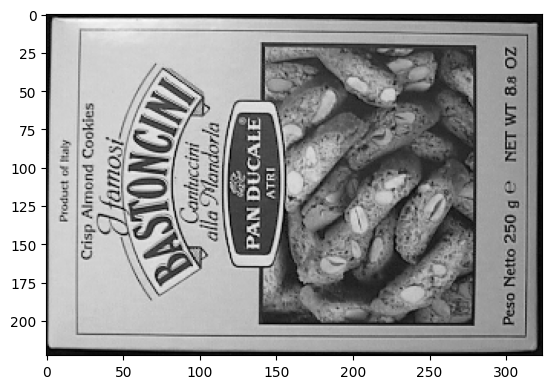

In [11]:
# Load reference image
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png -O test_image.png
ref_img = cv2.imread('test_image.png')

if ref_img is None:
    raise FileNotFoundError("Upload 'reference.jpg' to Colab.")

# Convert to grayscale
gray_ref = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_ref, cmap='gray')
plt.show()

> Applying SIFT(library) and showing Keypoints

Reference image processed. Keypoints: 604


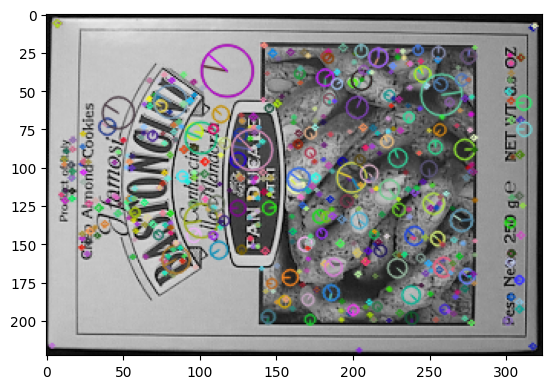

In [17]:
# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
ref_kp, ref_des = sift.detectAndCompute(gray_ref, None)

# Display the keypoints on the image
ref_img_with_kp = cv2.drawKeypoints(gray_ref, ref_kp, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Show the image with keypoints
plt.imshow(ref_img_with_kp)

print(f"Reference image processed. Keypoints: {len(ref_kp)}")

> Matching Template with another image


Downloading...
From: https://drive.google.com/uc?id=1KfANIcWjnIp060TFPgLA_ZykXSNCBzM3
To: /content/match.png
100% 122k/122k [00:00<00:00, 68.7MB/s]


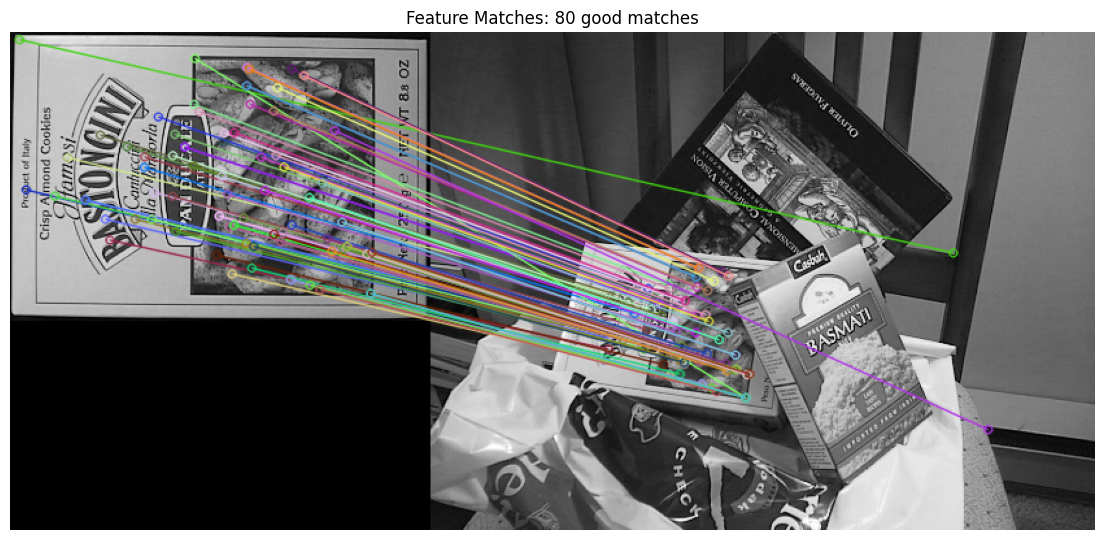

In [20]:
# Load the new image to match against the reference

#!gdown 15xg1mafHxzTobSsWK8FPj6hk-Ef-TmrB -O match.png
!gdown 1KfANIcWjnIp060TFPgLA_ZykXSNCBzM3 -O match.png

new_img = cv2.imread('match.png')
if new_img is None:
    raise FileNotFoundError("Upload 'new.jpg' to Colab.")

# Convert to grayscale
gray_new = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors in the new image
new_kp, new_des = sift.detectAndCompute(gray_new, None)

# Match features using BFMatcher (Brute Force)
bf = cv2.BFMatcher()
matches = bf.knnMatch(ref_des, new_des, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw top matches
matched_img = cv2.drawMatches(
    ref_img, ref_kp,
    new_img, new_kp,
    good_matches,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Show the matches
plt.figure(figsize=(14, 8))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title(f"Feature Matches: {len(good_matches)} good matches")
plt.axis('off')
plt.show()
